In [1]:
import numpy as np
print "log of x= 0:", np.log(1)
print "log 0: ",np.log(0) #무한
print "log negative: ",np.log(-1) #계산 불가 

log of x= 0: 0.0
log 0:  -inf
log negative:  nan


C:\Users\G312\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\G312\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [2]:
sigmoid=lambda(x):1.0/(1+np.exp(-x))
print "logit -100: {0:.3f}".format(sigmoid(-100))
print "sigmoid of x=-1:", sigmoid(-1)
print "logit    0: {0:.3f}".format(sigmoid(0))
print "sigmoid of x= 1:", sigmoid(1)
print "logit  100: {0:.3f}".format(sigmoid(100))

logit -100: 0.000
sigmoid of x=-1: 0.2689414213699951
logit    0: 0.500
sigmoid of x= 1: 0.7310585786300049
logit  100: 1.000


In [3]:
odds=lambda(x):x/(1-x)
print "odds 0: {0:.3f}".format(odds(0))
print "odds 1/6: {0:.3f}".format(odds(1/6.))
print "odds 0.5: {0:.3f}".format(odds(0.5))

odds 0: 0.000
odds 1/6: 0.200
odds 0.5: 1.000


In [4]:
x=np.arange(-5,5,0.05)
#x=np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,
#            3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])

C:\Users\G312\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


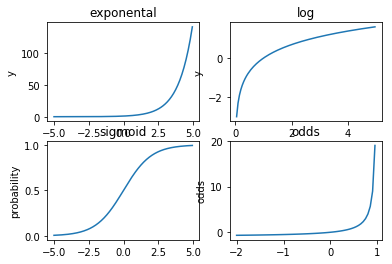

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()

ax221=fig.add_subplot(221)
ax221.set_title('exponental') #지수함수
exp=np.exp(x)
ax221.plot(x,exp,'-')
ax221.set_ylabel('y') 

ax222=fig.add_subplot(222)
ax222.set_title('log') #로그함수
log=np.log(x)
ax222.plot(x,log,'-')
ax222.set_ylabel('y')

ax223=fig.add_subplot(223)
ax223.set_title('sigmoid') #시그모이드
sigmoid=lambda(x):1.0/(1+np.exp(-x))
sig=sigmoid(x)
ax223.plot(x,sig,'-')
ax223.set_ylabel('probability')


ax224=fig.add_subplot(224)
ax224.set_title('odds') #승수
x=np.arange(-2,1,0.05)  # when x=1, division by zero
odds=lambda(x):x/(1-x)
odd=odds(x)
ax224.plot(x,odd,'-')
ax224.set_ylabel('odds')

plt.show()

로그함수의 성질 공부 필요

In [6]:
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
x=np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
y=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

In [7]:
print x[:5], x.shape

[0.5  0.75 1.   1.25 1.5 ] (20L,)


In [8]:
x=np.array([x,np.ones(x.shape[0])])
x=x.T
x.shape

(20L, 2L)

In [9]:
print x

[[0.5  1.  ]
 [0.75 1.  ]
 [1.   1.  ]
 [1.25 1.  ]
 [1.5  1.  ]
 [1.75 1.  ]
 [1.75 1.  ]
 [2.   1.  ]
 [2.25 1.  ]
 [2.5  1.  ]
 [2.75 1.  ]
 [3.   1.  ]
 [3.25 1.  ]
 [3.5  1.  ]
 [4.   1.  ]
 [4.25 1.  ]
 [4.5  1.  ]
 [4.75 1.  ]
 [5.   1.  ]
 [5.5  1.  ]]


In [11]:
import statsmodels.api as sm
logit = sm.Logit(y,x)
result = logit.fit()
w1,w0=result.params
print w1,w0

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
1.5046454283733333 -4.07771343108763


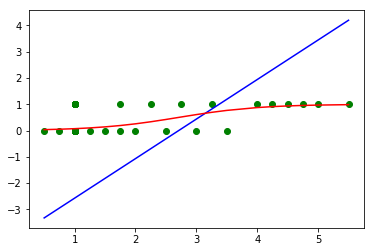

In [12]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'go')
plt.plot(x,w0+w1*x,'b-')
plt.plot(x,1/(1+np.exp(-(w0+w1*x))),'r-')
plt.show()

In [14]:
x1=x #여기부터 경사하강법
y1=y

In [15]:
x1.shape, y1.shape

((20L, 2L), (20L,))

In [16]:
print x1[:5]

[[0.5  1.  ]
 [0.75 1.  ]
 [1.   1.  ]
 [1.25 1.  ]
 [1.5  1.  ]]


In [17]:
print y1[:5]

[0 0 0 0 0]


In [18]:
def sigmoid(x):
    import numpy as np
    return 1.0/(1+np.exp(-x))

In [19]:
def h(x,theta):
    z=np.dot(x,theta)
    return sigmoid(z)

In [20]:
weights=np.ones([x1.shape[1],1])
print weights,weights.shape

[[1.]
 [1.]] (2L, 1L)


In [21]:
h(x1[:5],weights)

array([[0.81757448],
       [0.8519528 ],
       [0.88079708],
       [0.90465054],
       [0.92414182]])

In [22]:
y1=y1[:,np.newaxis]
y1.shape
def loss(h, y): #손실 함수 = 비용 함수
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [23]:
loss(h(x1,weights),y1)

1.4373882978982158

In [24]:
h(x1,weights).shape, x1.shape,y1.shape #error의 개수 20개

((20L, 1L), (20L, 2L), (20L, 1L))

In [25]:
error=h(x1,weights)-y1
print error.shape

(20L, 1L)


In [26]:
np.dot(x1.T,error)

array([[16.42888382],
       [ 9.05573467]])

In [27]:
def gradientDescent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]

In [28]:
gradientDescent(x1,h(x1,weights),y1)

array([[0.82144419],
       [0.45278673]])

In [29]:
iter=10000
alpha=0.01
#m=X.shape[0]
#####weights=np.ones([x1.shape[1]])
weights=np.ones([x1.shape[1],1])
#theta=np.array([1,1],dtype=float)
for i in range(iter):
    #predicted
    _h=h(x1,weights)
    #error
    error=_h-y1
    #gradient=np.dot(x1.T, error) / y1.shape[0]
    gradient=np.dot(x1.T, error)
    #update
    weights-=alpha*gradient
    if i%1000==0:
        print "{0} theta:{1}".format(i,weights)
print weights

0 theta:[[0.83571116]
 [0.90944265]]
1000 theta:[[ 1.46445514]
 [-3.95885309]]
2000 theta:[[ 1.50248787]
 [-4.07133946]]
3000 theta:[[ 1.50452706]
 [-4.07736375]]
4000 theta:[[ 1.50463893]
 [-4.07769422]]
5000 theta:[[ 1.50464507]
 [-4.07771238]]
6000 theta:[[ 1.50464541]
 [-4.07771337]]
7000 theta:[[ 1.50464543]
 [-4.07771343]]
8000 theta:[[ 1.50464543]
 [-4.07771343]]
9000 theta:[[ 1.50464543]
 [-4.07771343]]
[[ 1.50464543]
 [-4.07771343]]


In [39]:
#여기부터 입학

In [40]:
import pandas as pd
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [31]:
df.columns = ["admit", "gre", "gpa", "prestige"] #prestige = 평판

In [32]:
print df.describe()

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [33]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


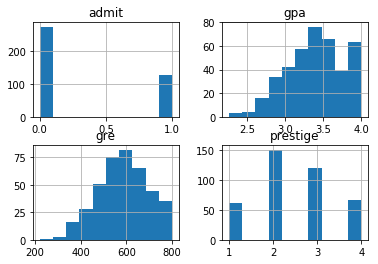

In [34]:
%matplotlib inline
import pylab as pl
df.hist()
pl.show()

In [35]:
#모델링 : cleanup, 탐색 이후에 진행
from patsy import dmatrices
y, X = dmatrices('admit ~ gre + gpa + C(prestige)', df, return_type = 'dataframe')

X.head()

,Intercept,C(prestige)[T.2L],C(prestige)[T.3L],C(prestige)[T.4L],gre,gpa
0,1.0,0.0,1.0,0.0,380.0,3.61
1,1.0,0.0,1.0,0.0,660.0,3.67
2,1.0,0.0,0.0,0.0,800.0,4.00
3,1.0,0.0,0.0,1.0,640.0,3.19
4,1.0,0.0,0.0,1.0,520.0,2.93


In [36]:
#statsModel
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y,X)
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Nov 2019   Pseudo R-squ.:                 0.08292
Time:                        16:33:54   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(presti

In [37]:
print result.params

print result.conf_int()

Intercept           -3.989979
C(prestige)[T.2L]   -0.675443
C(prestige)[T.3L]   -1.340204
C(prestige)[T.4L]   -1.551464
gre                  0.002264
gpa                  0.804038
dtype: float64
                          0         1
Intercept         -6.224242 -1.755716
C(prestige)[T.2L] -1.295751 -0.055135
C(prestige)[T.3L] -2.016992 -0.663416
C(prestige)[T.4L] -2.370399 -0.732529
gre                0.000120  0.004409
gpa                0.153684  1.454391


In [38]:
#sklearn

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

C:\Users\G312\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\G312\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-3.97765654e+00, -6.74567838e-01, -1.33708167e+00,
        -1.55029740e+00,  2.25513644e-03,  8.01765502e-01]])

In [41]:
#데이터 성별 실습
import statsmodels.api as sm
mass=sm.datasets.get_rdataset("survey","MASS")

In [43]:
type(mass.data)
mass.data.columns

Index([u'Sex', u'Wr.Hnd', u'NW.Hnd', u'W.Hnd', u'Fold', u'Pulse', u'Clap',
       u'Exer', u'Smoke', u'Height', u'M.I', u'Age'],
      dtype='object')

In [44]:
mass.data.columns=['sex','wr','nw','w','fold','pulse','clap','exer','smoke','height','mi','age']

In [45]:
mass.data.columns

Index([u'sex', u'wr', u'nw', u'w', u'fold', u'pulse', u'clap', u'exer',
       u'smoke', u'height', u'mi', u'age'],
      dtype='object')

In [46]:
#종속 변수
mass.data.groupby('sex').mean()

,wr,nw,pulse,height,age
sex,,,,,
Female,17.595763,17.45678,75.126316,165.686667,20.407534
Male,19.741880,19.71453,73.197917,178.826038,20.331958


In [47]:
mass.data.groupby('sex').count()

,wr,nw,w,fold,pulse,clap,exer,smoke,height,mi,age
sex,,,,,,,,,,,
Female,118,118,117,118,95,118,118,118,102,102,118
Male,117,117,118,118,96,117,118,117,106,106,118


In [51]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mass.data)
plt.title('Heatmap', fontsize=20)
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''